In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
# import math lib
from math import pi

# import Qiskit
# from qiskit import Aer, IBMQ, execute
from qiskit_aer import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit import transpile, assemble
import matplotlib.pyplot as plt # for plotting purpose
# from qiskit.tools.visualization import plot_histogram

In [5]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')


In [6]:
# calculate arccos thetas which further usee in qc
def get_theta(d):
    x = d[0]
    y = d[1]

    theta = 2*math.acos((x+y)/2.0)
    return theta

In [7]:
# a quantum-inspired approach to distance calculation.
# it help to calculate distance between two points

def get_Distance(x,y):
    theta_1 = get_theta(x)
    theta_2 = get_theta(y)

    # create Quantum Register called "qr" with 3 qubits
    qr = QuantumRegister(3, name="qr")
    # create Classical Register called "cr" with 3  bits
    cr = ClassicalRegister(3, name="cr")

    # Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
    # and your Classical Register "cr"
    qc = QuantumCircuit(qr, cr, name="k_means")

    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])

    qc.u3(theta_1, pi, pi, qr[1])
    qc.u3(theta_2, pi, pi, qr[2])
    qc.cswap(qr[0], qr[1], qr[2])
    qc.h(qr[0])

    qc.measure(qr[0], cr[0])
    qc.reset(qr)

    #print('----before run----')
    job = execute(qc,backend=backend, shots=1024)
    #print('----after run----')
    result = job.result()
    data = result.get_data()['counts']

    if len(data)==1:
        return 0.0
    else:
        return data['001']/1024.0



In [8]:
# creates dataset
# n_samples = data points
# n_feature  = dimensions
# centers = no of cluster
# cluster_std = sd of points



def get_data(n,k,std):
    data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=std, random_state=100)
    points = data[0]
    centers = data[1]

    return points,centers

In [9]:
# draw the points on graph
def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [10]:
# draw centroids on graph
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1],color='purple',marker='*')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [11]:
def initialize_centers(points,k):
    return points[np.random.randint(points.shape[0],size=k),:]

In [12]:
def get_Distance(x, y):
    return np.linalg.norm(x - y)

In [13]:
def find_nearest_neighbour(points, centroids):
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)

    for i in range(n):
        min_dis = float('inf')  # Changed from 10000 to infinity for generality
        ind = 0
        for j in range(k):
            temp_dis = get_Distance(points[i, :], centroids[j, :])

            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind

    return centers

In [14]:
def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1

    centroids = np.zeros([k,2])

    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])

    return centroids

In [15]:
#normalize
def preprocess(points):
    n = len(points)
    x = 30.0*np.sqrt(2)
    for i in range(n):
        points[i,:]+=15
        points[i,:]/=x

    return points

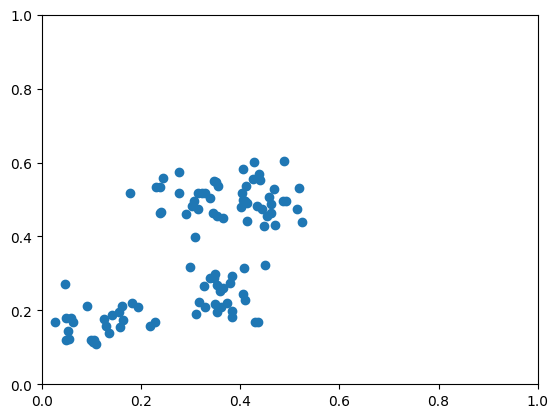

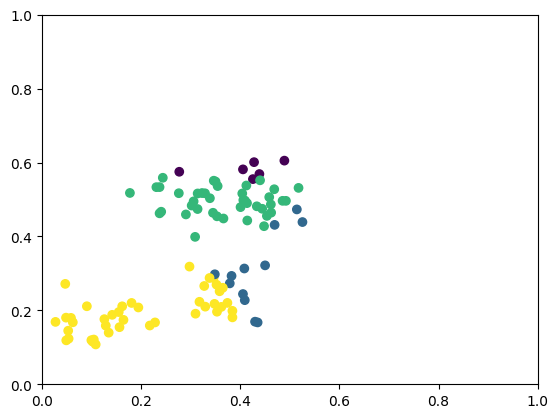

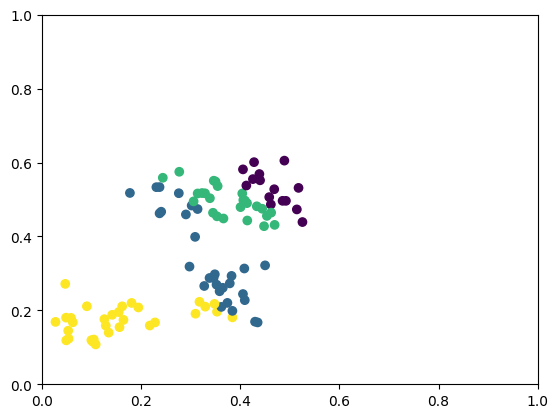

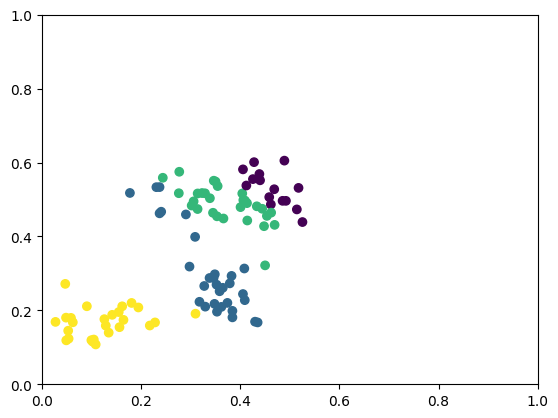

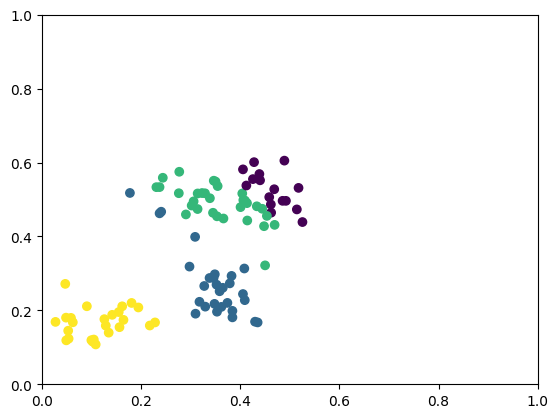

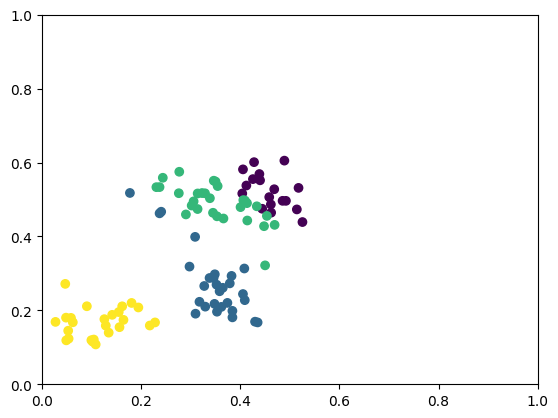

In [16]:
n = 100     # number of data points
k =  4       # Number of centers
std = 2      # std of datapoints

points,o_centers = get_data(n,k,std)       #dataset

points = preprocess(points)                # Normalize dataset
plt.figure()
draw_plot(points,o_centers,label=False)

centroids = initialize_centers(points,k)   # Intialize centroids



# run k-means algorithm
for i in range(5):

    centers = find_nearest_neighbour(points,centroids)       # find nearest centers
    plt.figure()
    draw_plot(points,centers)
    #plot_centroids(centroids)
    centroids = find_centroids(points,centers)               # find centroids